In [80]:
import pandas as pd
import numpy as np
from numpy import math



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, auc
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('D://Employee.csv')

In [3]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
numeric_feature = df.describe().columns

In [6]:
numeric_feature

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [53]:
numeric_feature_ = ['Attrition','Age', 'DailyRate', 'DistanceFromHome',
        'EmployeeNumber','HourlyRate','MonthlyIncome', 'MonthlyRate',
       'PercentSalaryHike','TotalWorkingYears','YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

In [7]:
age = pd.DataFrame(df['Age'])

In [8]:
DFH = pd.DataFrame(df['DistanceFromHome'])

In [9]:
Js = pd.DataFrame(df['JobSatisfaction'])

In [10]:
salary = pd.DataFrame(df['MonthlyIncome'])

In [11]:
df1 = pd.concat([age,DFH,Js,salary],1)

In [12]:
df1

,Age,DistanceFromHome,JobSatisfaction,MonthlyIncome
0,41,1,4,5993
1,49,8,2,5130
2,37,2,3,2090
3,33,3,3,2909
4,27,2,2,3468
...,...,...,...,...
1465,36,23,4,2571
1466,39,6,1,9991
1467,27,4,2,6142
1468,49,2,2,5390


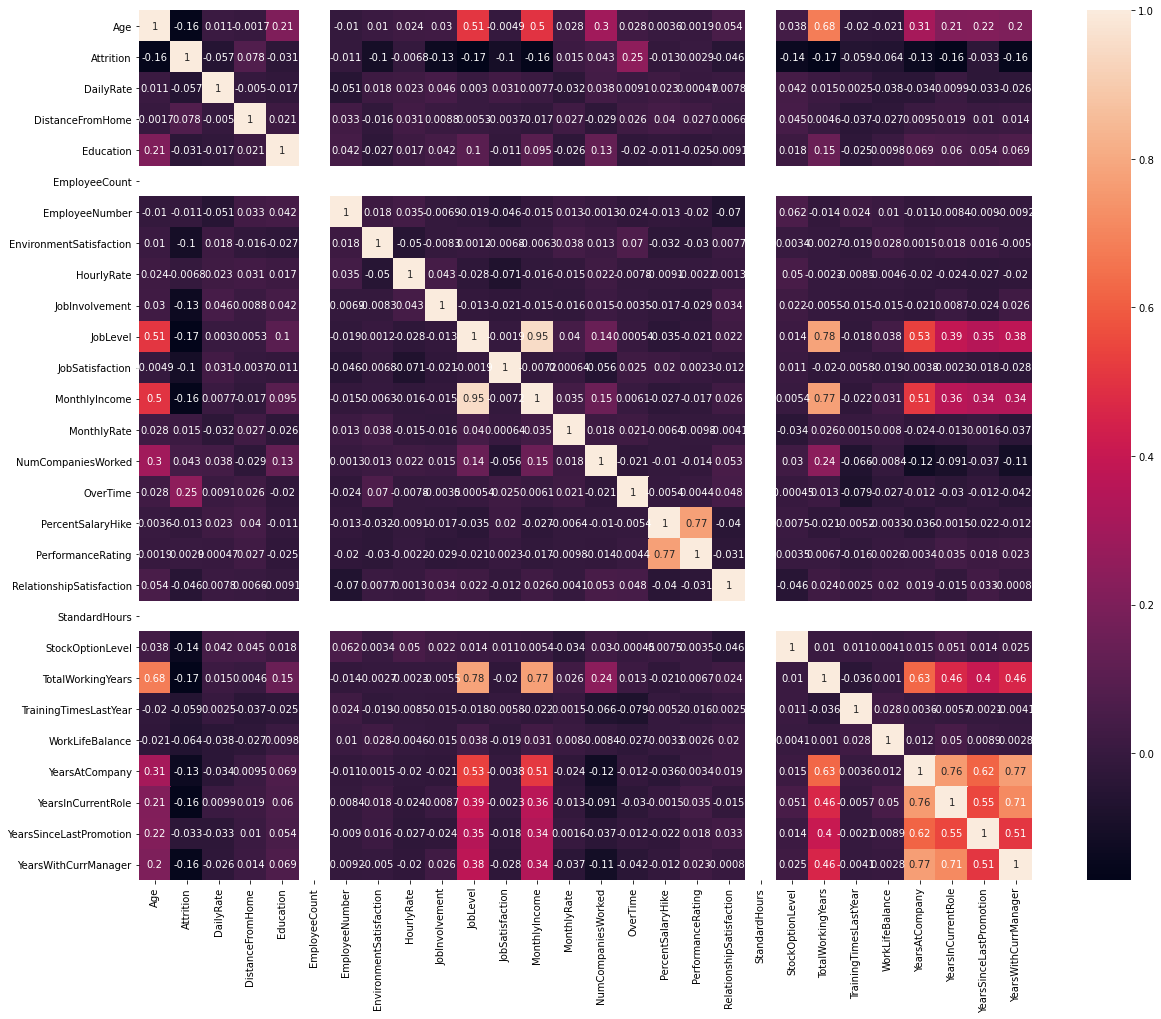

In [48]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),annot=True)
plt.show()

Age
0.4132863018563338


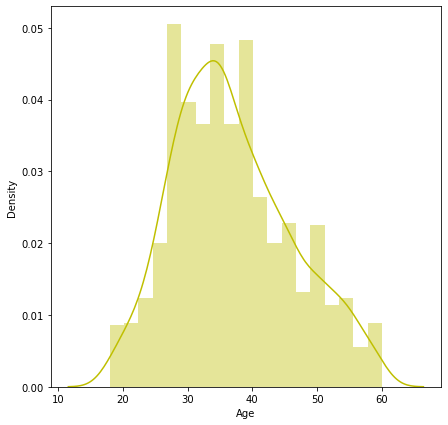

DailyRate
-0.003518568352325854


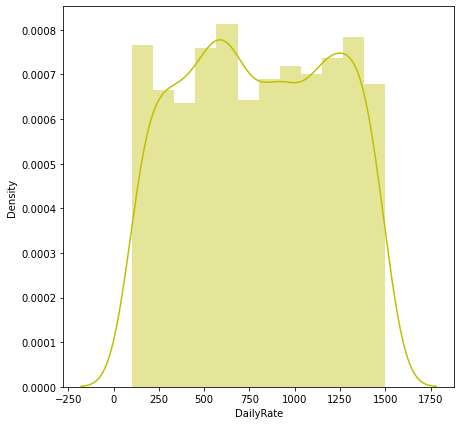

DistanceFromHome
0.9581179956568269


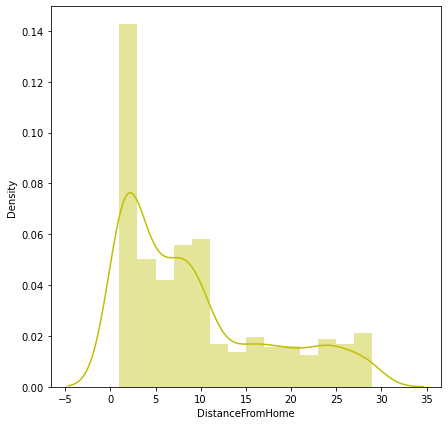

EmployeeNumber
0.016574019580105036


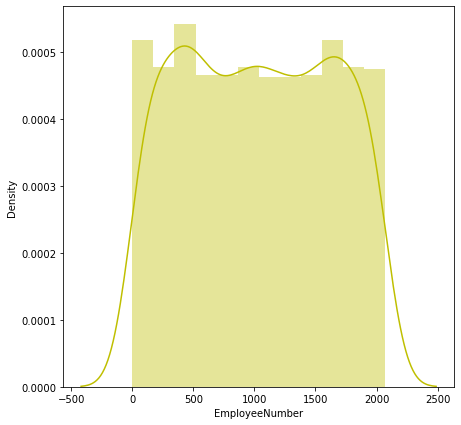

HourlyRate
-0.03231095290044942


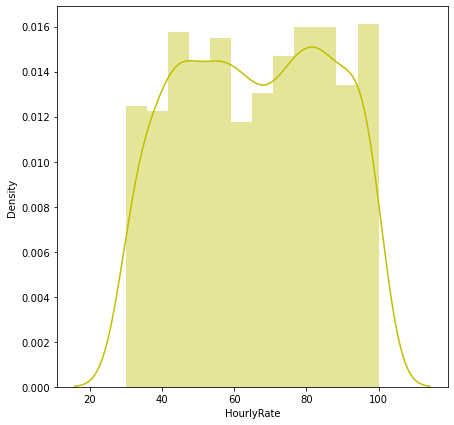

MonthlyIncome
1.3698166808390662


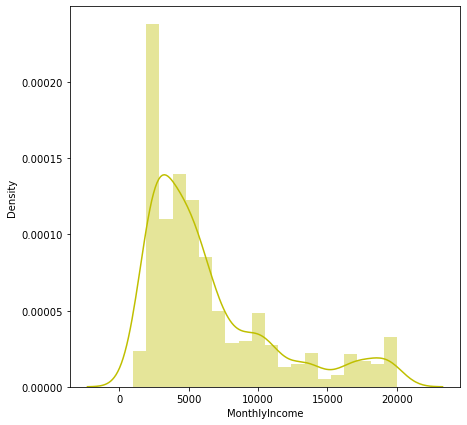

MonthlyRate
0.018577807891132458


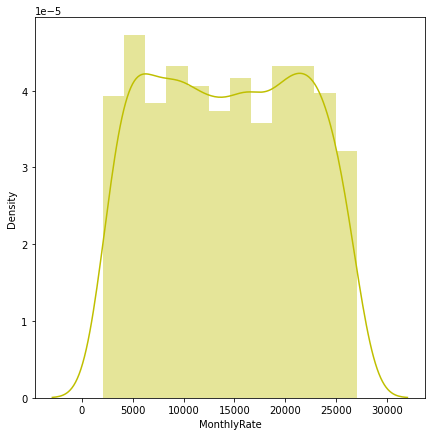

PercentSalaryHike
0.8211279755780908


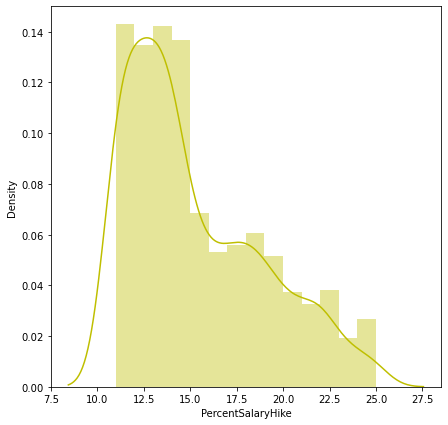

TotalWorkingYears
1.1171718528128527


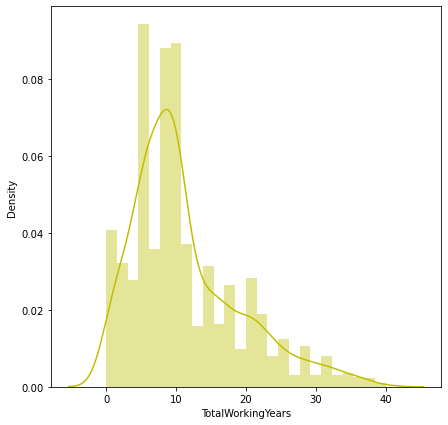

YearsAtCompany
1.7645294543422085


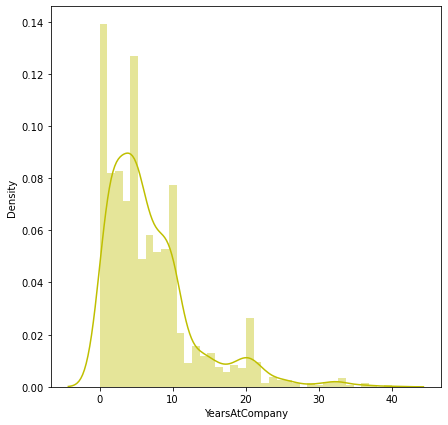

YearsInCurrentRole
0.9173631562908262


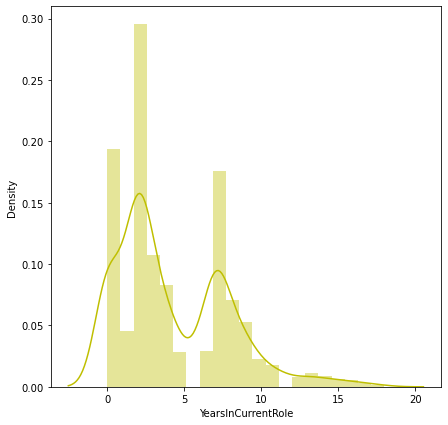

YearsSinceLastPromotion
1.9842899833524859


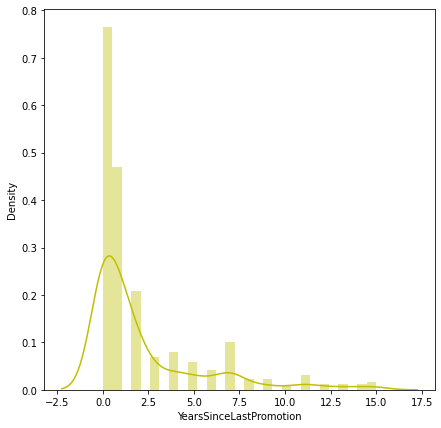

YearsWithCurrManager
0.8334509919918475


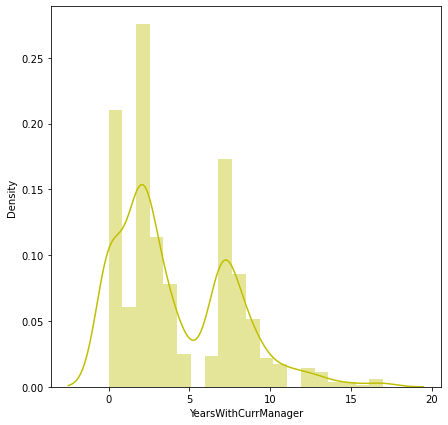

In [63]:
for col in numeric_feature_[1:]:
    fig = plt.figure(figsize=(7,7))
    sns.distplot(df[col],color='y')
    print(col)
    print(df[col].skew())
    plt.show()    

0.2861922926389171

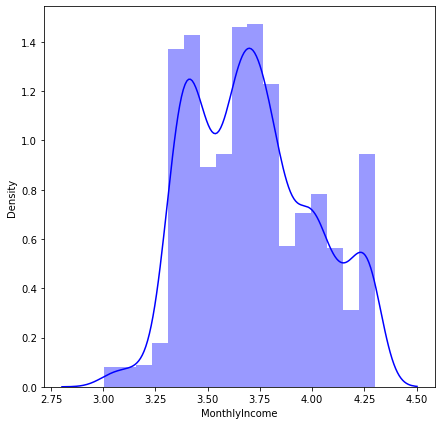

In [40]:
fig = plt.figure(figsize=(7,7))
sns.distplot(np.log10(df['MonthlyIncome']),color='b')
np.log10(df['MonthlyIncome']).skew()

In [ ]:
for col in numeric_feature[:]

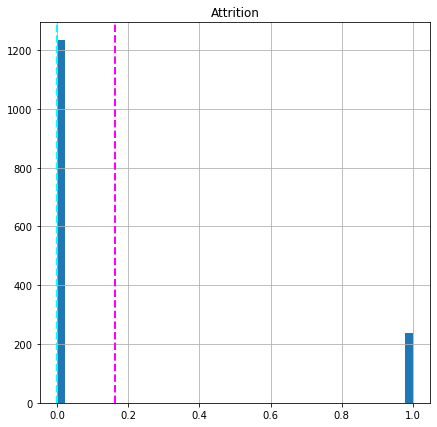

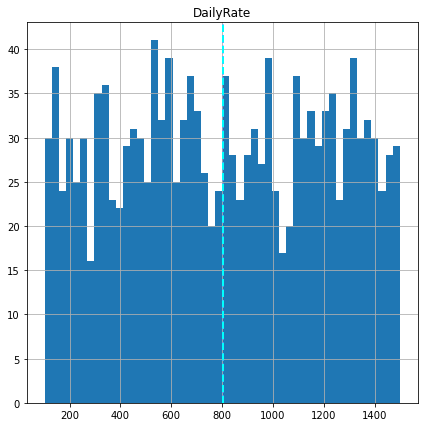

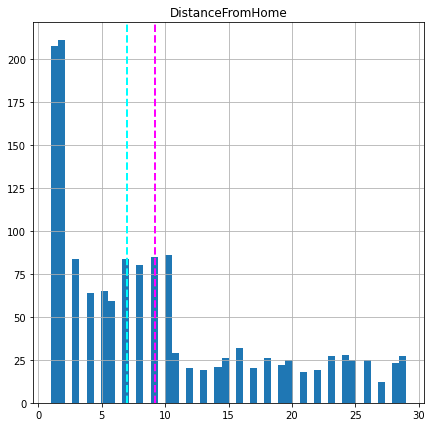

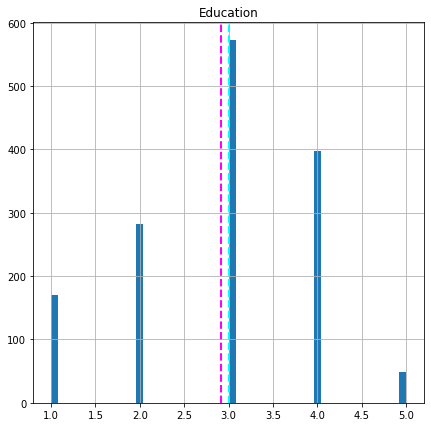

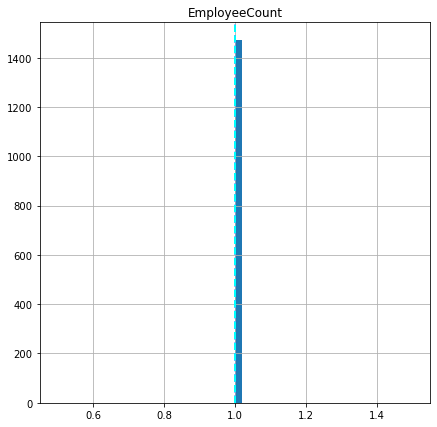

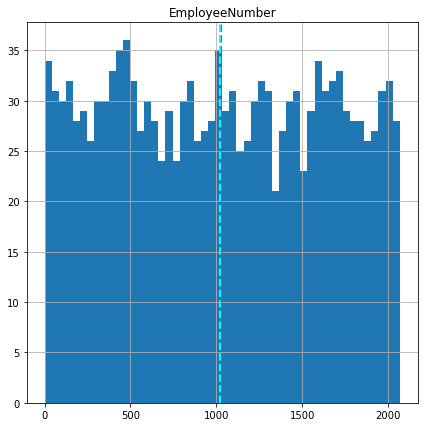

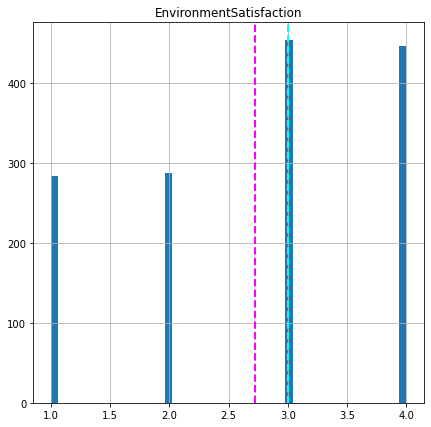

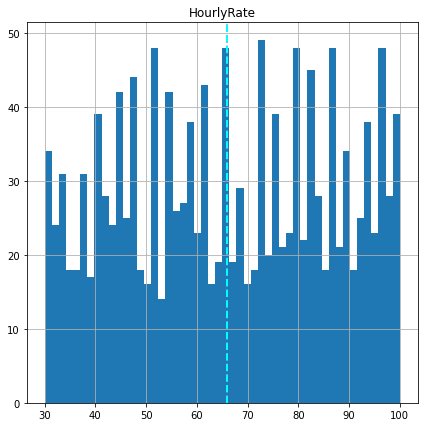

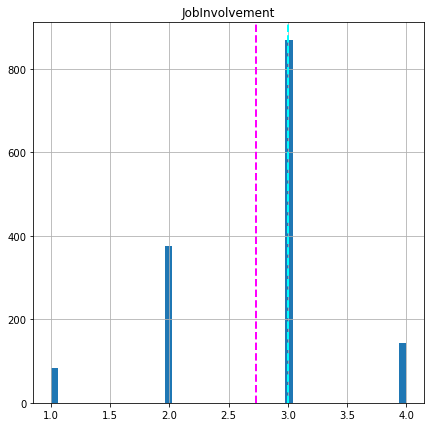

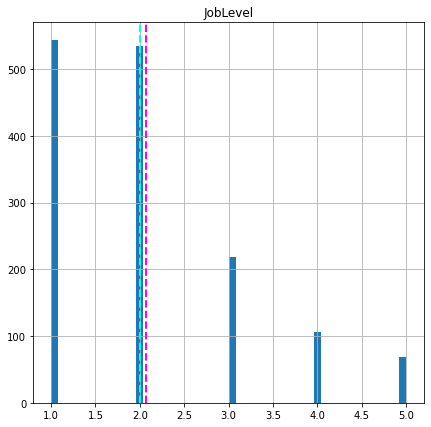

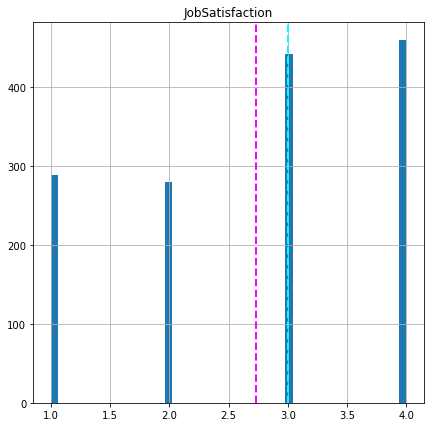

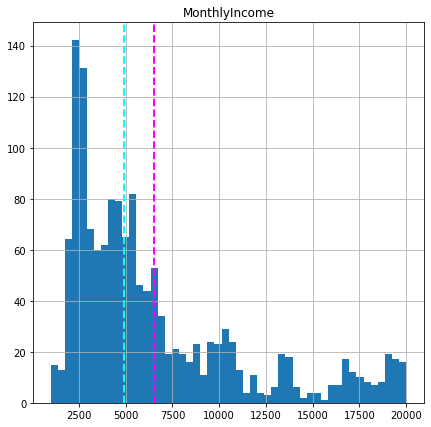

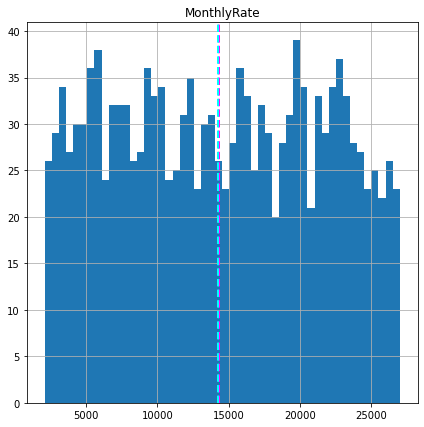

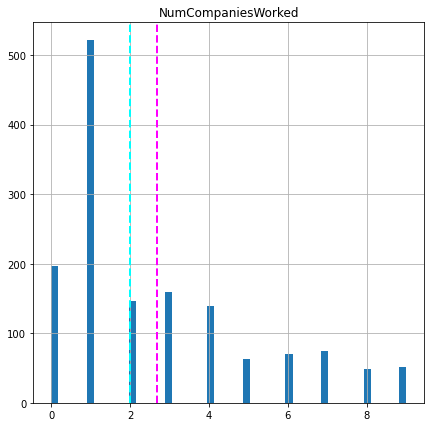

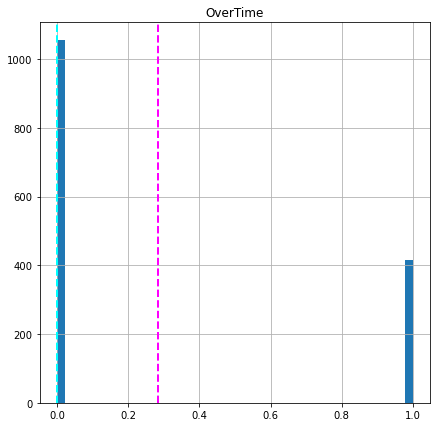

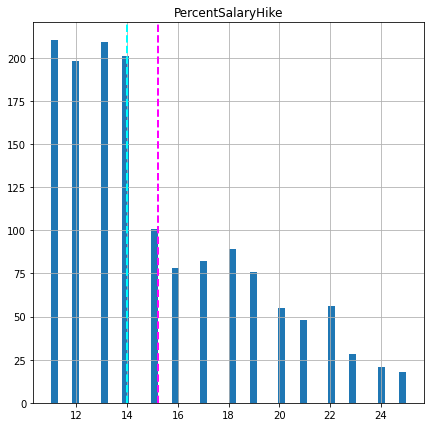

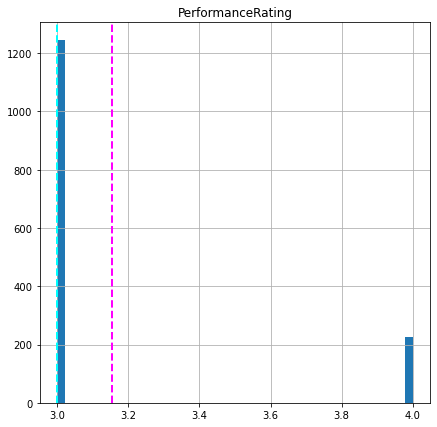

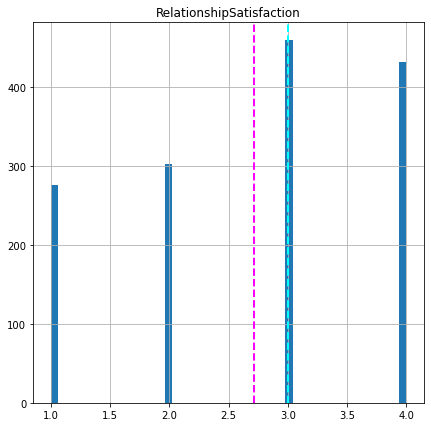

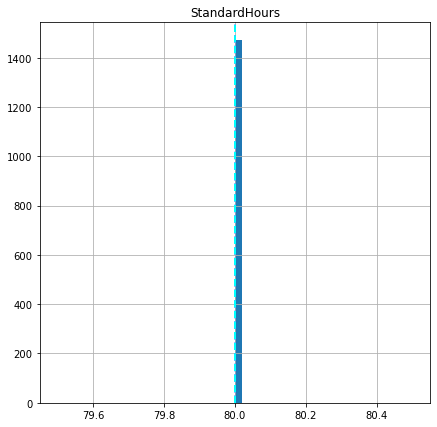

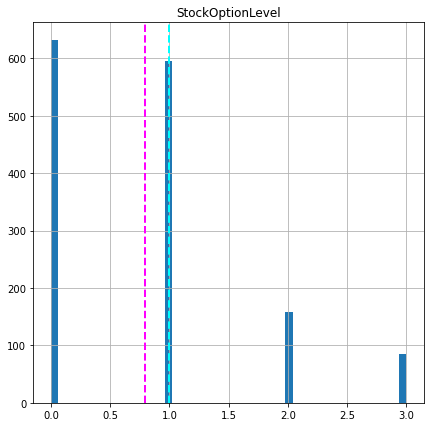

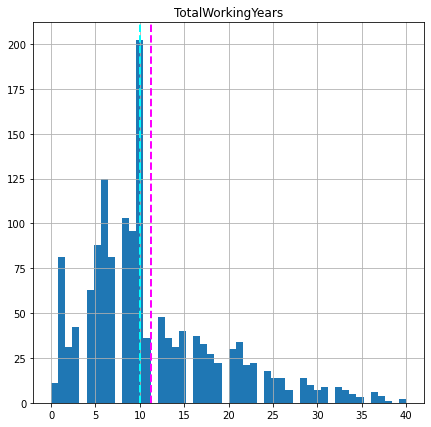

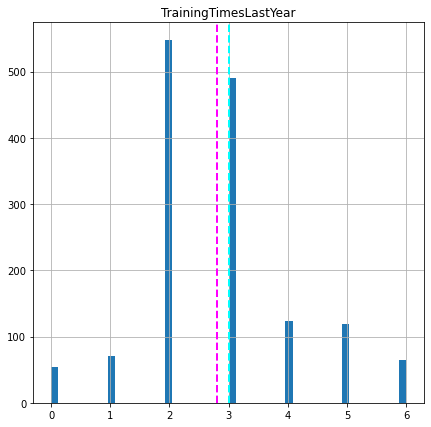

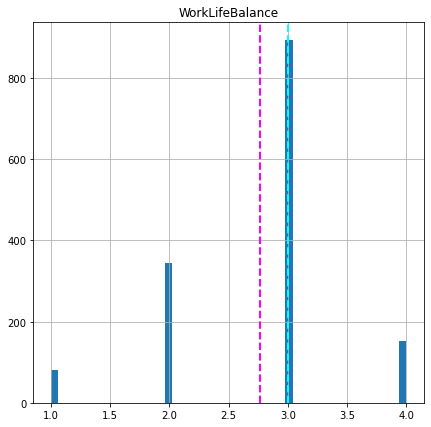

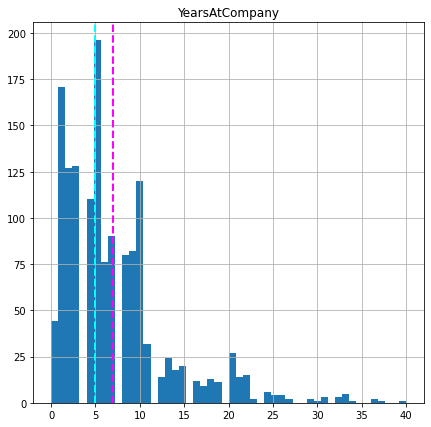

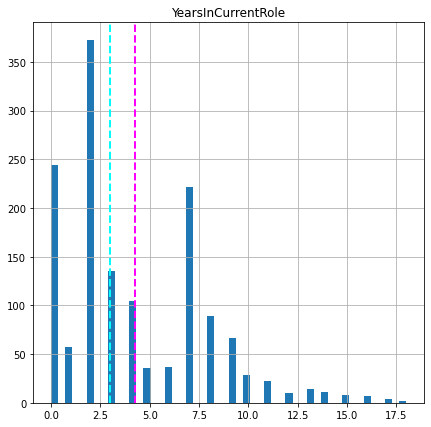

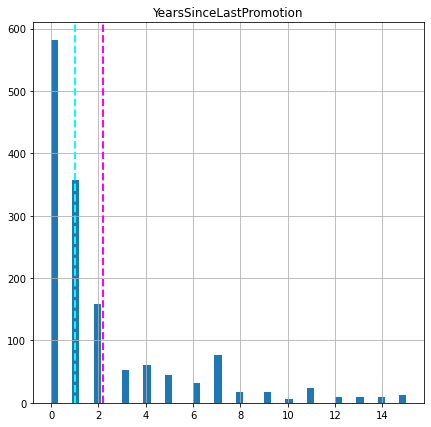

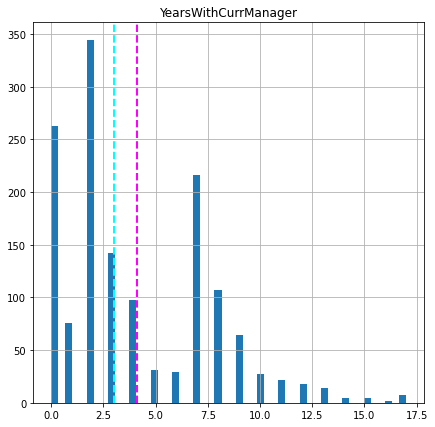

In [16]:
for col in numeric_feature[1:]:
    fig = plt.figure(figsize=(7,7))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50,ax=ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

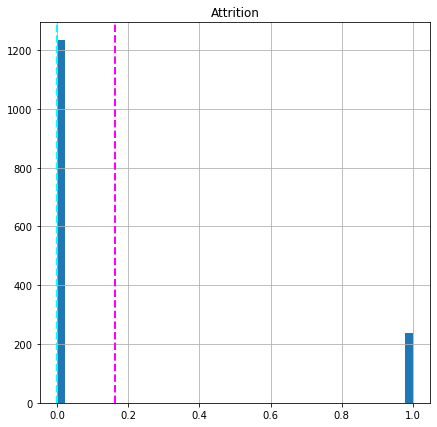

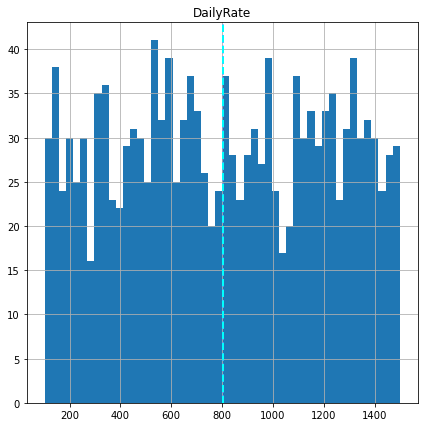

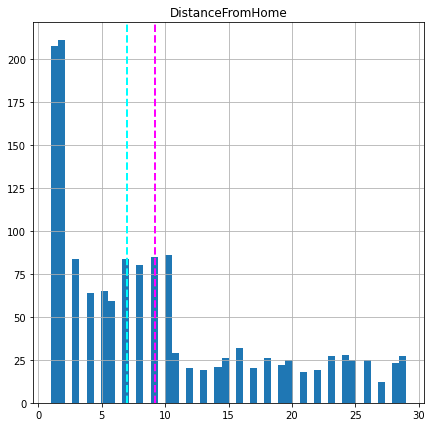

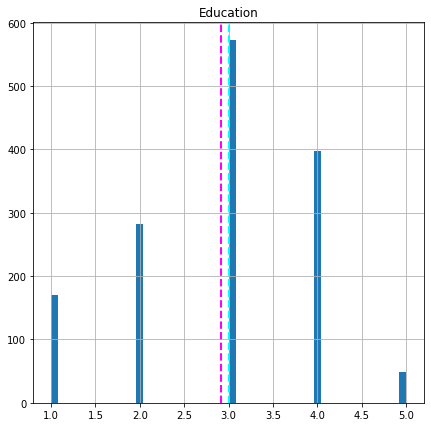

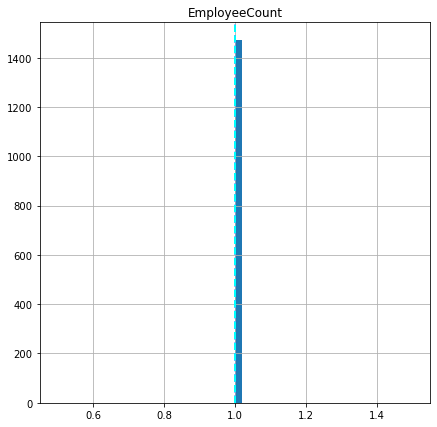

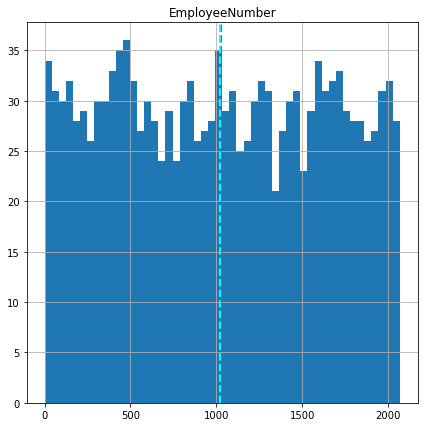

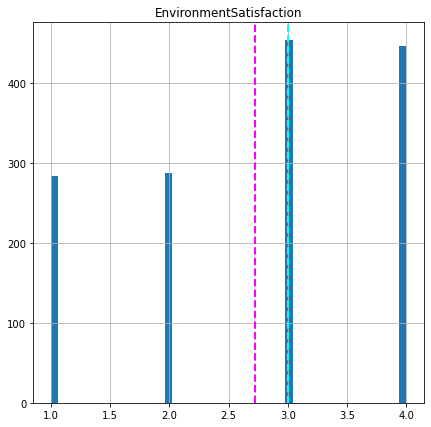

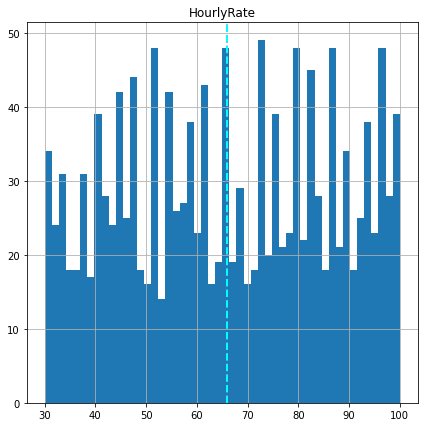

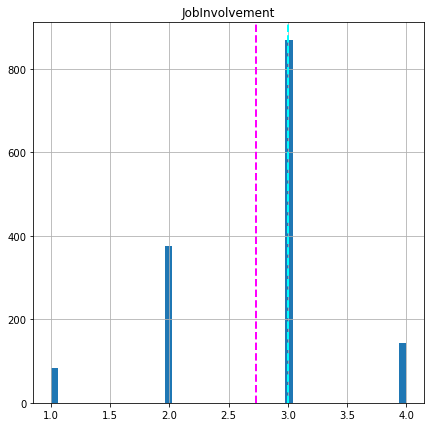

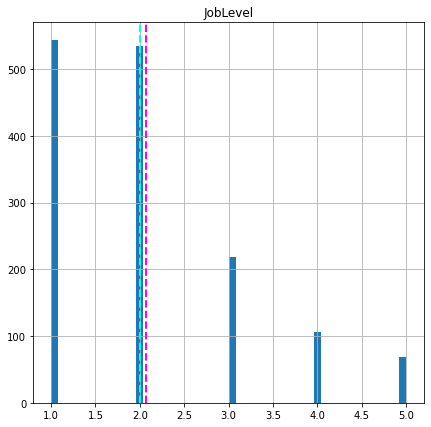

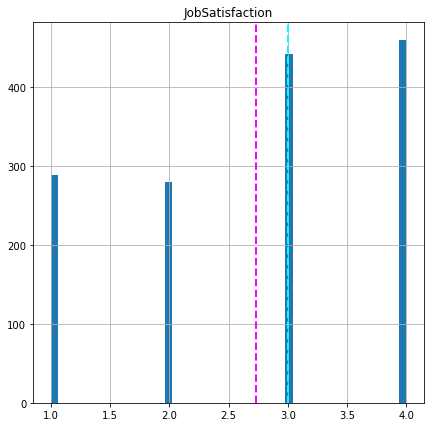

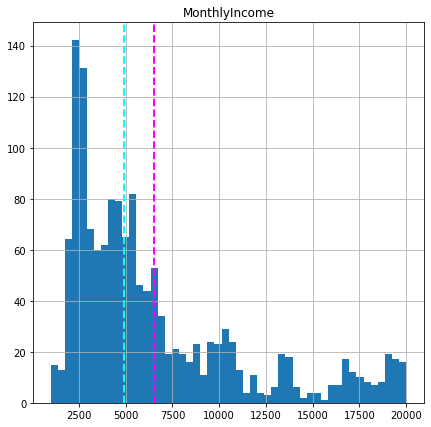

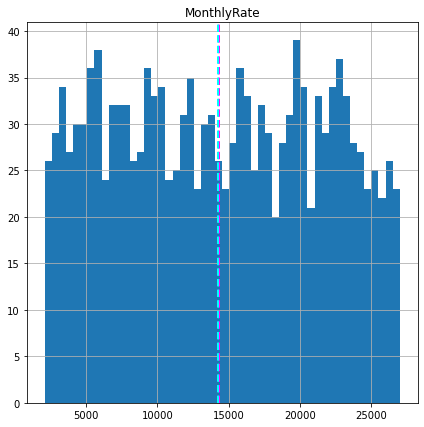

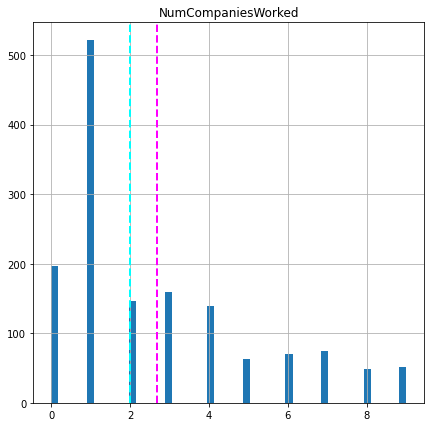

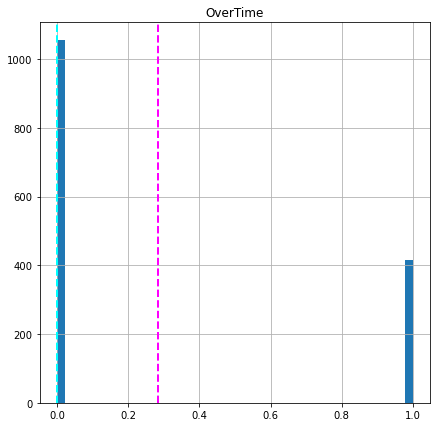

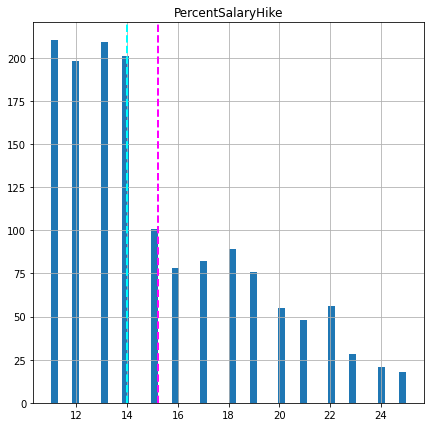

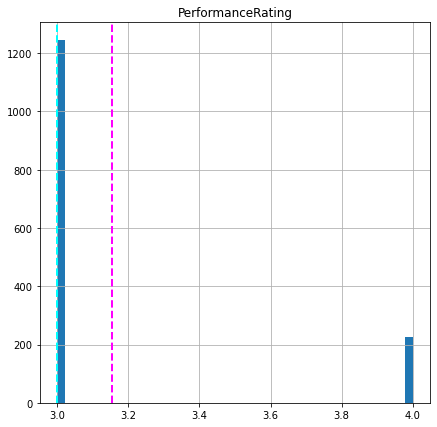

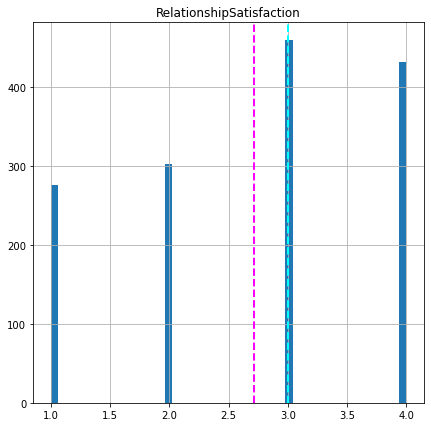

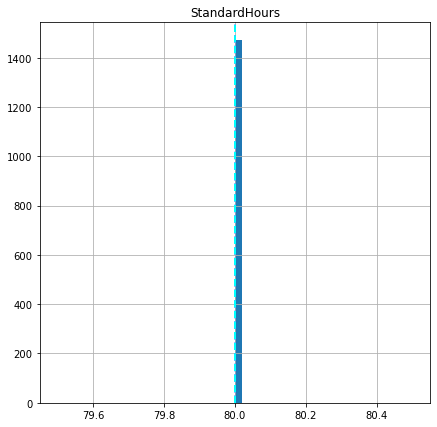

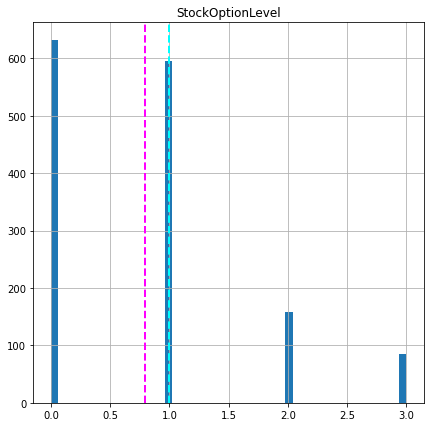

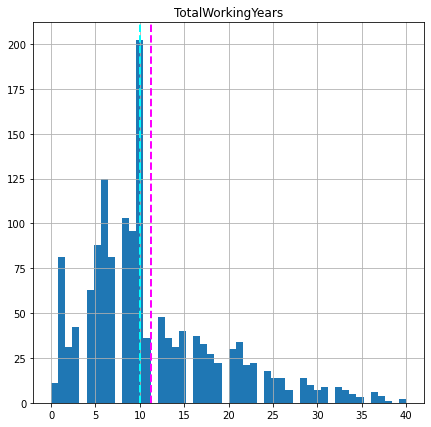

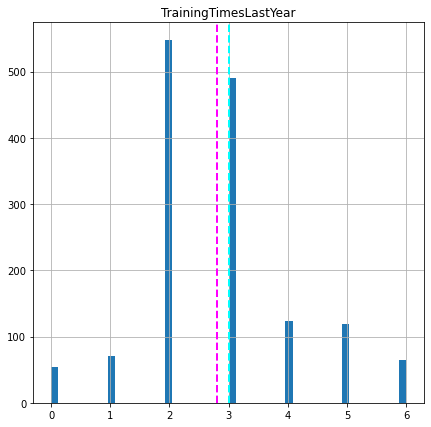

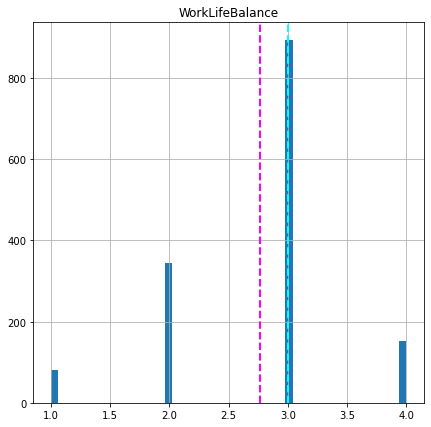

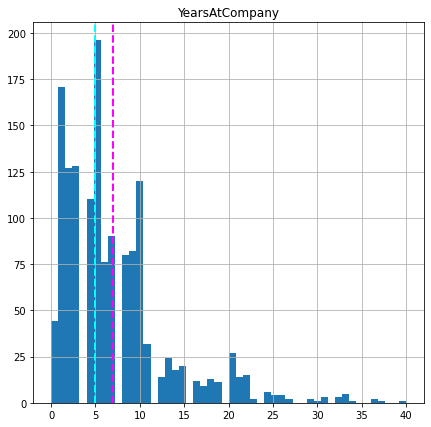

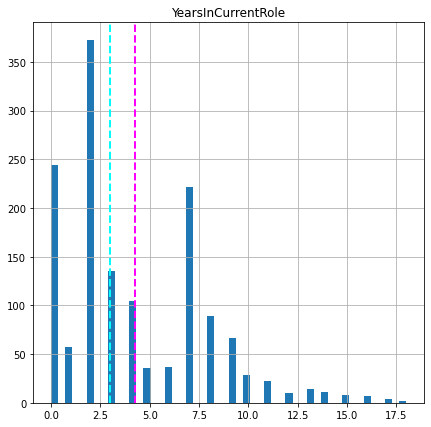

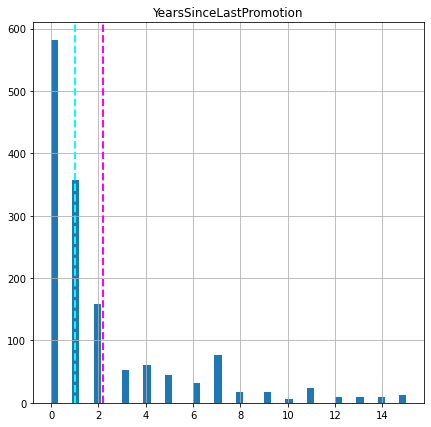

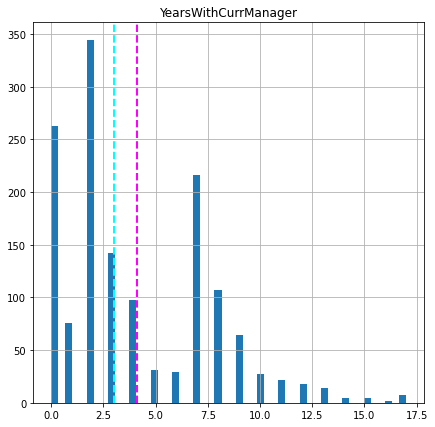

In [17]:
for col in numeric_feature[1:]:
    fig = plt.figure(figsize=(7,7))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50,ax=ax)
    ax.axvline(feature.mean(),color='magenta',linestyle='dashed',linewidth=2)
    ax.axvline(feature.median(),color='cyan',linestyle='dashed',linewidth=2)
    ax.set_title(col)
plt.show()

In [18]:
plt.figure(figsize=(7,7))
# sns.heatmap(df1)

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

In [21]:
dependent= 'Attrition'

In [22]:
independent = ['Age','DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome' ]

In [23]:
X=df[independent].to_numpy()

In [24]:
y=df[dependent].to_numpy()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40,random_state=1)

In [26]:
X.ndim

2

In [27]:
y.ndim

1

In [28]:
X.shape

(1470, 12)

In [29]:
y.shape

(1470,)

In [78]:
attrition_classifier = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=5,random_state=9)
attrition_classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5, random_state=9)

In [31]:
y_predicted = attrition_classifier.predict(X_test)

In [32]:
y_predicted[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [33]:
y_test[:10]

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [34]:
accuracy_score(y_test, y_predicted) * 100

80.95238095238095

In [35]:
df.iloc[-1]

Age                                             34
Attrition                                        0
BusinessTravel                       Travel_Rarely
DailyRate                                      628
Department                  Research & Development
DistanceFromHome                                 8
Education                                        3
EducationField                             Medical
EmployeeCount                                    1
EmployeeNumber                                2068
EnvironmentSatisfaction                          2
Gender                                        Male
HourlyRate                                      82
JobInvolvement                                   4
JobLevel                                         2
JobRole                      Laboratory Technician
JobSatisfaction                                  3
MaritalStatus                              Married
MonthlyIncome                                 4404
MonthlyRate                    

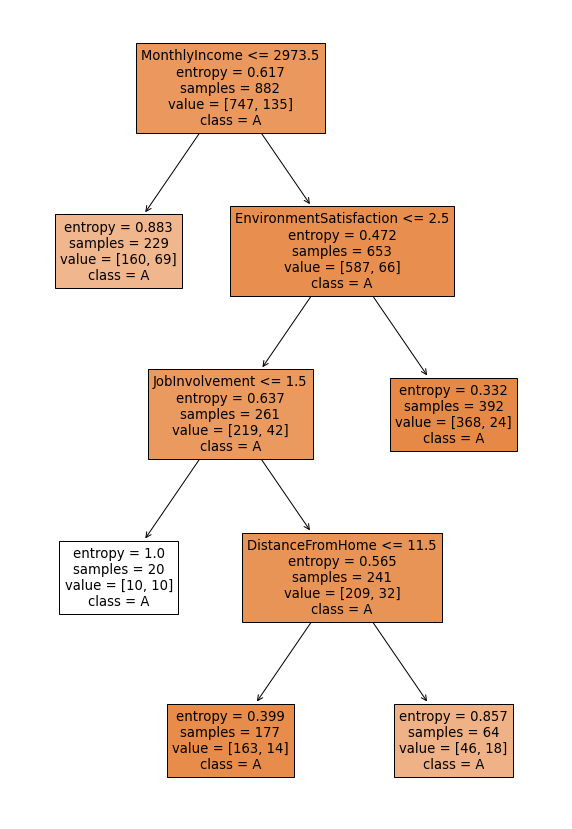

In [79]:
fig = plt.figure(figsize=(10,15))

_ = tree.plot_tree(attrition_classifier,
                   feature_names = ['Age','DailyRate', 'DistanceFromHome', 'Education',
                                  'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
                                  'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 
                                  'MonthlyIncome'],
                   class_names = 'Attrition',filled=True)